In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


import seaborn as sb
sns.kdeplot(ratings_dataset['rating'])

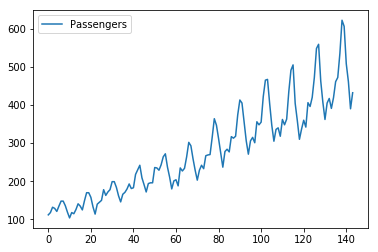

In [12]:
#data.plot()
plt.plot(data['#Passengers'],label='Passengers')
plt.legend()

In [8]:
data=data.set_index('Month')

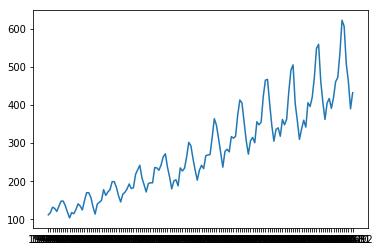

In [12]:
plt.plot(data['#Passengers'])

In [13]:
data.index = pd.to_datetime(data.index)

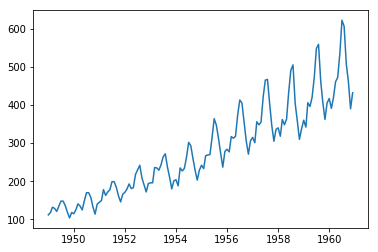

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['#Passengers'])

In [49]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [50]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
data.rolling

In [51]:
r_mean=data.rolling(2).mean()
r_mean.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,115.0
1949-03-01,125.0
1949-04-01,130.5
1949-05-01,125.0


In [52]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


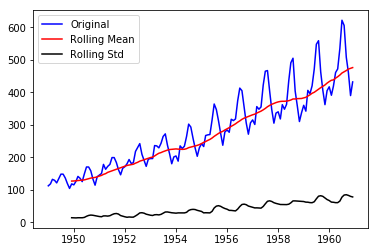

In [53]:
r_mean=data.rolling(12).mean()
r_std=data.rolling(12).std()
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(r_mean, color='red', label='Rolling Mean')
std = plt.plot(r_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')

In [14]:
from statsmodels.tsa.stattools import adfuller

In [55]:
st=adfuller(data['#Passengers'].dropna())

In [56]:
st

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [57]:
def stationary_test(ts_data):
    r_mean=ts_data.rolling(12).mean()
    r_std=ts_data.rolling(12).std()
    orig = plt.plot(ts_data, color='blue',label='Original')
    mean = plt.plot(r_mean, color='red', label='Rolling Mean')
    std = plt.plot(r_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    st=adfuller(ts_data.iloc[:,0].dropna())
    print('The Test Statistics P value is', st[1])
    if st[1]>0.05:
        print('The Signal is non stationary')
    else:
        print('The Signal is stationary')

The Test Statistics P value is 0.9918802434376411
The Signal is non stationary


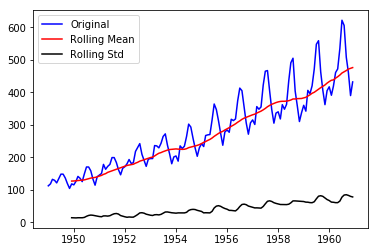

In [58]:
stationary_test(data)

In [59]:
r_mean=data.rolling(12).mean()
data1=data-r_mean
data1=data1.dropna()

The Test Statistics P value is 0.022104139473878785
The Signal is stationary


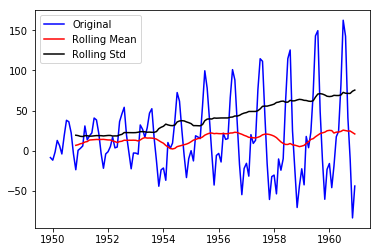

In [60]:
stationary_test(data1)

The Test Statistics P value is 0.022234630001244236
The Signal is stationary


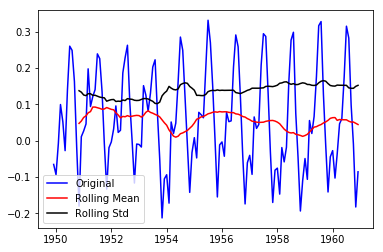

In [61]:
data_log=np.log(data)
r_mean=data_log.rolling(12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

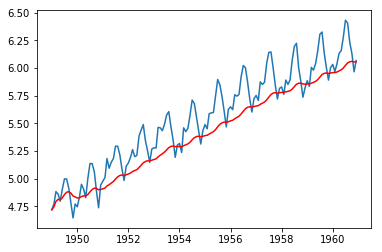

In [62]:
expwighted_avg= data_log.ewm(halflife=12).mean()
plt.plot(data_log)
plt.plot(expwighted_avg, color='red')

The Test Statistics P value is 0.0057369388015119215
The Signal is stationary


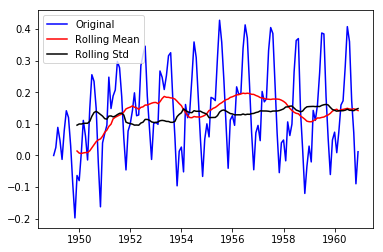

In [63]:
r_mean=data_log.ewm(halflife=12).mean()
data1=data_log-r_mean
data1=data1.dropna()
stationary_test(data1)

In [64]:

data_diff=data.diff(2)

The Test Statistics P value is 0.03862975767698741
The Signal is stationary


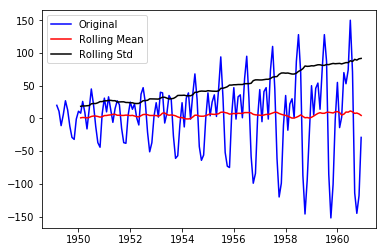

In [65]:
stationary_test(data_diff.dropna())

The Test Statistics P value is 7.419304549380349e-13
The Signal is stationary


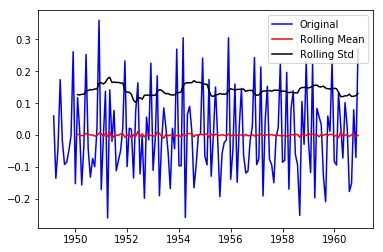

In [66]:
data_diff=data_log.diff().diff()
stationary_test(data_diff.dropna())

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

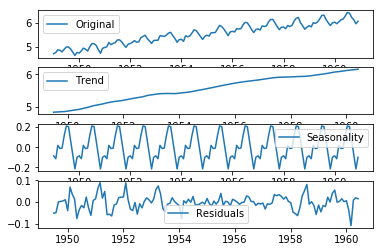

In [68]:
plt.subplot(4,1,1)
plt.plot(data_log, label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
#plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.

The Test Statistics P value is 2.8850589033233625e-08
The Signal is stationary


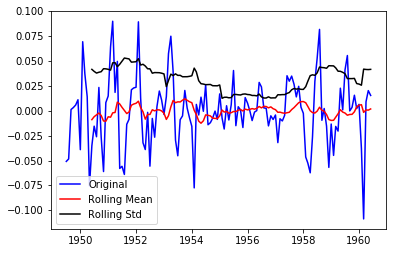

In [69]:
stationary_test(residual)

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

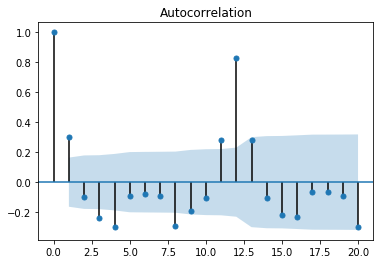

In [71]:
plot_acf(data.diff().dropna(),lags=20);

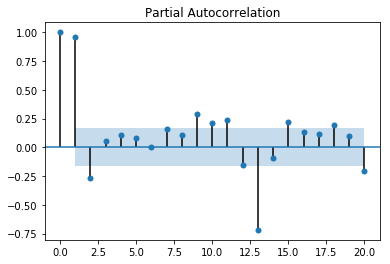

In [72]:
plot_pacf(data.dropna(),lags=20);

In [ ]:
!pip uninstall statsmodels

In [ ]:
!pip install numpy scipy patsy pandas

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pmdarima

In [106]:
from pmdarima.arima.utils import ndiffs
ndiffs(data,test='adf') #adf,kpss,pp

ImportError: cannot import name 'assert_equal' from 'statsmodels.compat.pandas' (C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

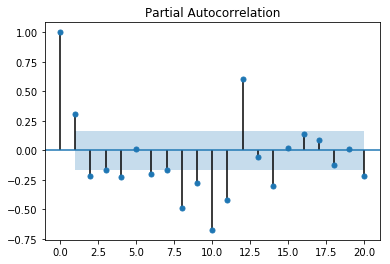

In [75]:
plot_pacf(data.diff().dropna(),lags=20);

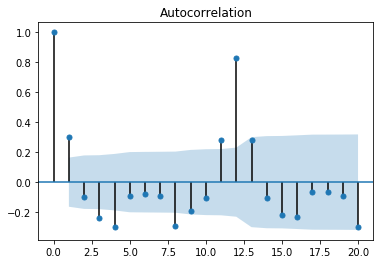

In [76]:
plot_acf(data.diff().dropna(),lags=20);

In [77]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(3, 0, 3))  
results_ARIMA = model.fit() 

C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # But again, only want to raise the exception if `dates`
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  not (index.freq == freq)):
C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  else:


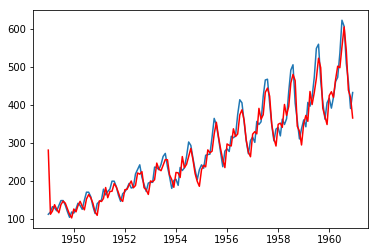

In [78]:
plt.plot(data)
plt.plot(results_ARIMA.fittedvalues, color='red')

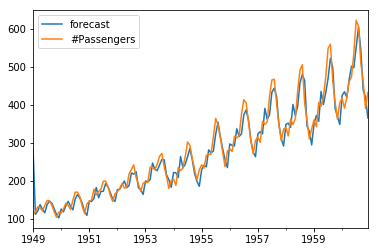

In [82]:
# Actual vs Fitted
results_ARIMA.plot_predict()
plt.show()

In [83]:
print(results_ARIMA.summary())

ImportError: cannot import name 'assert_equal' from 'statsmodels.compat.pandas' (C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [84]:
!pip install statsmodels

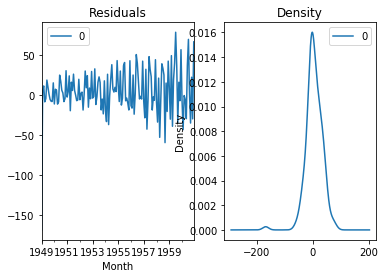

In [85]:
# Plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [135]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [86]:


# Create Training and Test
train = data['#Passengers'][:130]
test = data['#Passengers'][130:]

In [87]:
# Forecast
fc, se, conf = results_ARIMA.forecast(14, alpha=0.05)  # 95% conf

In [88]:
fc

array([447.70152037, 458.98103311, 481.15506927, 507.1371167 ,
       529.66141871, 543.21219998, 545.26972898, 536.62506555,
       520.78871523, 502.75348902, 487.51133838, 478.74224387,
       477.99960738, 484.5485963 ])

In [89]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

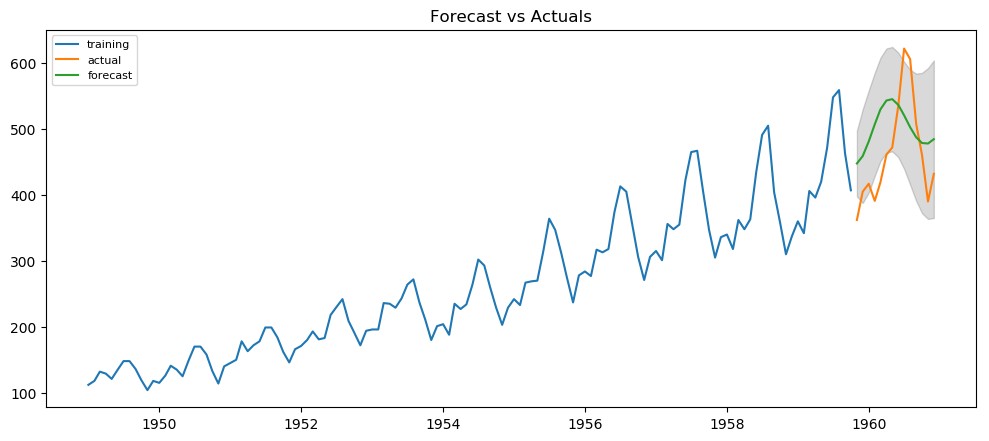

In [90]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [98]:
# Accuracy metrics
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

forecast_accuracy(fc, test.values)

{'mape': 0.15577217717629135,
 'me': 37.220510202804846,
 'mae': 69.35571839839635,
 'mpe': 0.10242576304715288,
 'rmse': 77.6354665339807,
 'acf1': 0.7112307998122139,
 'corr': 0.46179987795697114}

In [99]:
# metrics
from statsmodels.tsa.stattools import acf
mape = np.mean(np.abs(fc - test)/np.abs(test))  # MAPE
me = np.mean(fc - test)             # ME
mae = np.mean(np.abs(fc - test))    # MAE
mpe = np.mean((fc - test)/test)   # MPE
rmse = np.mean((fc - test)**2)**.5  # RMSE
corr = np.corrcoef(fc, test)[0,1]   # corr
acf1 = acf(fc-test)[1]              # ACF1


In [102]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
import pmdarima as pm

ImportError: cannot import name 'assert_equal' from 'statsmodels.compat.pandas' (C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [100]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

ImportError: cannot import name 'assert_equal' from 'statsmodels.compat.pandas' (C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [101]:
model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

NameError: name 'pm' is not defined

In [95]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: 'ARMA' object has no attribute 'plot_diagnostics'

In [96]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

ImportError: cannot import name 'assert_equal' from 'statsmodels.compat.pandas' (C:\Users\Gowrav Tata\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py)

In [97]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods,freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

NameError: name 'smodel' is not defined